In [1]:
import glob
import numpy as np
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

name1='/home/chew/outputdata/keff/2D/orikfac100_N423_L6.5_50tm_1.0208582rm_meankt'
name2='/home/chew/outputdata/keff/2D/newkfac100_N423_L6.5_50tm_1.0208582rm_meankt'
#name2='/home/chew/outputdata/keff/2D/newkfac100_N423_L6.5_50tm_1.0208582rm_meankt'
#name2='/home/chew/outputdata/keff/2D/orikfac100_N423_L6.5_50tm_1.0208582rm_meankt_test'
#name2 = '/home/chew/outputdata/keff/2D/orikfac100_N423_L6.5_50tm_1.0208582rm_NO_meankt_histofrxtime'

t1,kt1=np.loadtxt(name1,delimiter=',')
t2,kt2=np.loadtxt(name2,delimiter=',')
#t3,kt3=np.loadtxt(name3,delimiter=',')
T=[t1,t2]
KT=[kt1,kt2]

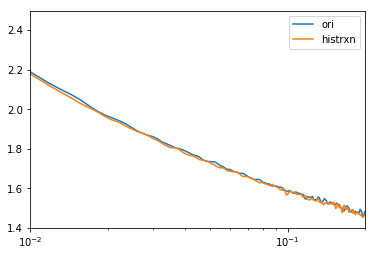

In [2]:
plt.plot(t1,kt1,label='ori')
#plt.plot(t3,kt3,label='new')
plt.semilogx(t2,kt2,label='histrxn')
plt.legend()
plt.xlim(1e-2,0.2)
plt.ylim(1.4,2.5)
T=[t1,t2]
KT=[kt1,kt2]

td 2.5e-05
ka 1256.6370614359173
expected [1261.80643161  317.75489346]
no of points 152
sq er fit1=0.0317911
no of points 152
sq er fit1=0.0290002


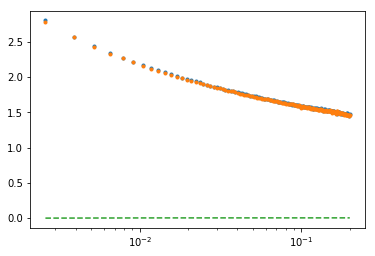

In [13]:
from scipy.optimize import curve_fit
import math
import numpy as np
from math import sqrt,pi,log
from scipy import special

D=1
kd= 4.0*pi*D
rm=0.005
td = (rm*2)**2/4/D
print('td',td)
R=2*rm
f=1.0208582 
g = 0.577216
kaf=100
factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            

def funcbk(t,C1,C2,C3): #lattice kt for long time
    A=np.log(C2*t)+C3
    return C1*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

def err(a,b):
    return ((a-b)*100/a)

def func(t,C1,C2): #lattice kt for long time
    b1=4*D/C2/C2
    A=np.log(b1*t)+4*pi*D/C1-2*g
    return 4*pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

def func2(t,C2): #lattice kt for long time
    b1=48*D/R/R/f/f
    AA = 2*pi/math.sqrt(3)
    A=np.log(b1*t)+AA*(1./Pa-1)
    return AA*C2*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)/Pa

def func3(t,Pa):
    l=f*R
    n = 4*D*t/l/l
    AA = 2*pi/math.sqrt(3)
    A=np.log(12*n)+AA*(1/Pa-1)
    return 4*pi*D*(1/A/A-2*g/A**3+(3*g*g-pi*pi/2)/A**4)/n

tol = 0.5
lb = lambda x: x-x*tol
ub = lambda x: x+x*tol
c1 = 4*pi*D
c2 = 4*D/R/R
c3=4*pi*D/R-2*g
ka=kaf*kd 
Pa1=ka*factor/D
Pa2=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
Pas = np.array([Pa1,Pa2])
print('ka',ka)
expt =2*sqrt(3)*D*Pas
#expt = [c1,c2,c3]
print('expected',expt)
fiterr=[]
tcut=100*td
cuts=[tcut]

for tcut in cuts:
    for i in range(len(KT)):
        #i+=1
        Pa = Pas[i]
        idx = T[i]>tcut
        x=T[i][idx]
        print('no of points',len(x))
        y=KT[i][idx]
        popt,pcov = curve_fit(func2,x,y)#,p0=[1],bounds=(-np.inf,np.inf))#,bounds=([lb(c1),lb(c2),lb(c3)],[ub(c1),ub(c2),ub(c3)]))#,sigma=sigma,absolute_sigma=False)
        perr = np.sqrt(np.diag(pcov))
        r1=sum((y-func2(x,*popt))**2)
        print('sq er fit1={:.7f}'.format(r1))
        #Er=[]
        #for j in range(len(expt)):
        #    Er.append(abs(err(expt[j],popt[j])))
        #    print('expected={:.4f}, fitted={:.5f}+-{:.5f}, error %={:.4f}'.format(expt[j],popt[j],perr[j],err(expt[j],popt[j])))
        #print('expected={:.4f}, fitted={:.5f}+-{:.5f}, error %={:.4f}'.format(expt[i],popt[j],perr[j],err(expt[i],popt[j])))
        plt.plot(x,y,'.',label='new')
        #plt.semilogx(x,func2(x,*popt),'-',label='fitted')
    #fiterr.append(max(Er))
#plt.semilogx(x,func(x,ka,R),'r--')
#plt.ylim(1.4,2.1)
plt.semilogx(x,func3(x,Pa2),'--')

In [157]:
d = pi*Pa*D/popt[0]
print(d,pi*sqrt(3)/6)
gamma=0.577216
f=1.0208582   
factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            
PP=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*gamma)/2/math.pi)
ka2 = PP*D/factor            
Pa2,popt[0]/2/sqrt(3)/D,ka2/2/sqrt(3)

0.8981363462784141 0.9068996821171088


(91.72793663882513, 92.62294853527871, 91.35214551293758)

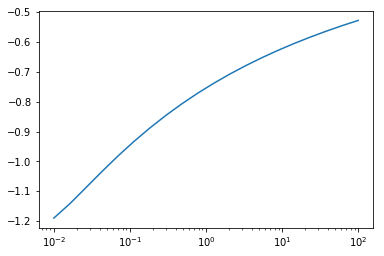

In [121]:
x=np.logspace(-2,2,20)
diff = (func(x,ka,R)-func(x,*popt))*100/func(x,ka,R)
plt.semilogx(x,diff)

[12.566370614359172, 40000.0, -1.144432]
no of points 134
sq er fit1=0.0060621
expected=12.5664, fitted=12.7649+-0.0788, error %=-1.5799
expected=40000.0000, fitted=40419.3553+-863403981.5146, error %=-1.0484
expected=-1.1444, fitted=-1.1335+-21361.1539, error %=0.9593
no of points 134
sq er fit1=0.0059939
expected=12.5664, fitted=12.6949+-0.0781, error %=-1.0228
expected=40000.0000, fitted=40107.1680+-913044283.6308, error %=-0.2679
expected=-1.1444, fitted=-1.1414+-22765.1121, error %=0.2613


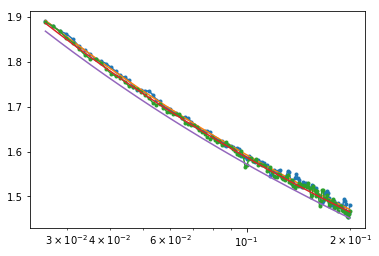

In [10]:
from scipy.optimize import curve_fit
import math
import numpy as np
from math import sqrt,pi,log
from scipy import special

D=1
kd= 4.0*pi*D
rm=0.005
td = (rm*2)**2/4/D
tcut = 1000*td
R=2*rm
f=1.0208582 
g = 0.577216
kaf=100.

def err(a,b):
    return (a-b)*100/a

def func(t,C1,C2,C3): #lattice kt for long time
    A=np.log(C2*t)+C3
    return C1*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4 )

tol = 0.5
lb = lambda x: x-x*tol
ub = lambda x: x+x*tol
ka=kaf*kd 
c1=4*pi*D
c2=4*D/R/R
c3=4*pi*D/ka-2*g
expt =[c1,c2,c3]
print(expt)
fiterr=[]
cuts=[800*td] #minimum of both
for i in range(2):
    idx = T[i]>tcut
    x=T[i][idx]
    print('no of points',len(x))
    y=KT[i][idx]
    #sigma = SD[i][idx][:-2]
    popt,pcov = curve_fit(func,x,y,p0=[c1,c2,c3],bounds=([lb(c1),lb(c2),ub(c3)],[ub(c1),ub(c2),lb(c3)]))#,sigma=sigma,absolute_sigma=False)
    perr = np.sqrt(np.diag(pcov))
    r1=sum((y-func(x,*popt))**2)
    print('sq er fit1={:.7f}'.format(r1))
    Er=[]
    for j in range(3):
        Er.append(abs(err(expt[j],popt[j])))
        print('expected={:.4f}, fitted={:.4f}+-{:.4f}, error %={:.4f}'.format(expt[j],popt[j],perr[j],err(expt[j],popt[j])))
    plt.plot(x,y,'.-',label='new')
    plt.semilogx(x,func(x,*popt),'-',label='fitted')
plt.semilogx(x,func(x,c1,c2,c3),'-',label='fitted')
diff = err(func(x,c1,c2,c3),func(x,*popt))

(0.020612244897959184, 0.02)

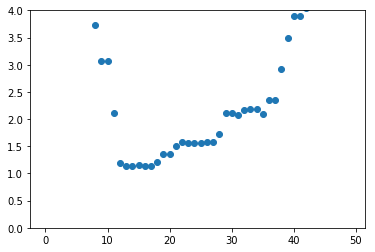

In [93]:
plt.plot(fiterr,'o')
plt.ylim(0,4)
cuts[17],td*800

In [45]:
ori10-19 new 15-19

(-1.144432, -1.0299888, -1.2588751999999999)

/home/chew/outputdata/keff/2D/orikfac100_N423_L6.5_50tm_1.0208582rm/*
N423
nosimrun 30000
/home/chew/outputdata/keff/2D/newkfac100_N423_L6.5_50tm_1.0208582rm/*
N423
nosimrun 30000


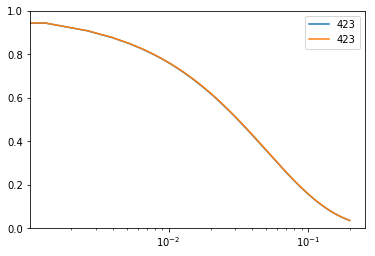

In [30]:
import glob
import numpy as np
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

L=5
L=6.5
f=1.0208582
kaf=0.01
kaf=100
Ns=[2010,2017] 
Ns=[251,252]
Ns=[252,252]
Ns=[423,423]
#Ns=[753,756]
#conc=10#10,30,80
actualA = [25.1282,25.2217]
actualA = [25.2217,25.2217]
actualA=[42.3799,42.3799]

def calk(stsim,t,C): #get kt from st
    dst = (stsim[2:]-stsim[:-2])/(t[2:]-t[:-2])
    dst=np.append((stsim[1]-stsim[0])/(t[1]-t[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2])/(t[-1]-t[-2])  )
    return -dst/stsim/C

def calk2(stsim,t,C): #get kt from st
    h = t[1]-t[0]
    dst=[]
    for i in range(len(stsim)-4):
        y=(-stsim[i+4]+8*stsim[i+3]-8*stsim[i+1]+stsim[i])
        dst.append(y)
    dst = np.array(dst)/12/h
    dst=np.append((stsim[2]-stsim[0])/2/h,dst)
    dst=np.append((stsim[1]-stsim[0])/h,dst)
    dst=np.append(dst,(stsim[-1]-stsim[-3])/2/h )
    dst=np.append(dst,(stsim[-1]-stsim[-2])/h )
    return -dst/stsim/C

patterns1 = ['/home/chew/outputdata/keff/2D/orikfac{}_N{}_L{}_50tm_{}rm/*'.format(kaf,Ns[0],L,f),
            '/home/chew/outputdata/keff/2D/newkfac{}_N{}_L{}_50tm_{}rm/*'.format(kaf,Ns[1],L,f)]
#
#'/home/chew/outputdata/keff/2D/orikfac{}_N{}_L{}_50tm_{}rm/*'.format(kaf,Ns[0],L,f),
def getst(N,pattern,ds):   
    fns = glob.glob(pattern)
    y=0
    #fns= fns[:50]
    tlast=0
    for fn in fns:
        r=np.loadtxt(fn,delimiter=',')
        y+=np.array(r).T[1][::ds]
        if tlast==0:
            tlast=np.array(r).T[0][-1]
        assert(tlast==np.array(r).T[0][-1])
    x=np.array(r).T[0][::ds]
    print('nosimrun',len(fns))
    y/=float(len(fns))
    s=y/float(N)
    plt.semilogx(x,s,'-',label=str(N))
    plt.ylim(0,1)
    return x,s       

TT=[]
ST=[]
for i,pattern in enumerate(patterns1):
    print(pattern)
    NN=Ns[i]
    print('N{}'.format(NN))
    t,st=getst(NN,pattern,1)    
    TT.append(t)
    ST.append(st)
plt.legend()


A 42.3799
conc 9.981146722856826
A 42.3799
conc 9.981146722856826


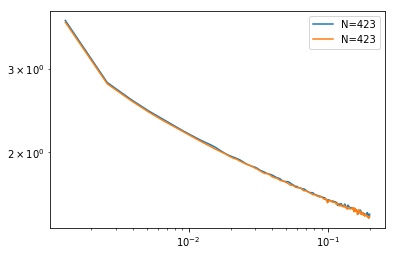

In [31]:
KT=[]
T=[]
for i,st in enumerate(ST):
    #pct=1
    Area=actualA[i]
    print('A',Area)
    #Area=Area*(1-pct/100.)
    #print('A',Area)
    NN=Ns[i]
    t=TT[i][1:]
    T.append(t)
    conc = NN/Area
    kt = calk(st,TT[i],conc)   
    print('conc',conc)
    KT.append(kt[1:])
    plt.loglog(t,kt[1:],'-',label='N='+str(NN))
plt.legend()

In [39]:
KT[0]

array([3.7965661 , 2.80886859, 2.58030947, 2.44333233, 2.35207032,
       2.28020554, 2.2214862 , 2.17550791, 2.13559582, 2.10368419,
       2.07715826, 2.04929421, 2.01789519, 1.99128253, 1.97065842,
       1.95675978, 1.94297402, 1.92779274, 1.90875247, 1.89078399,
       1.87971878, 1.8687276 , 1.86220417, 1.85055895, 1.83459698,
       1.82597797, 1.81653488, 1.80628947, 1.80150702, 1.7959972 ,
       1.78766947, 1.7784701 , 1.76947396, 1.76520763, 1.75823933,
       1.74456298, 1.73791853, 1.7363138 , 1.73561488, 1.73444531,
       1.72632387, 1.71551555, 1.71178739, 1.70192606, 1.69619719,
       1.69574992, 1.68748791, 1.68507239, 1.68127236, 1.67569424,
       1.67689979, 1.67404323, 1.66644615, 1.65986265, 1.65376189,
       1.65016294, 1.64510497, 1.64512886, 1.64626155, 1.64364999,
       1.63442097, 1.63062454, 1.62805173, 1.62331589, 1.62340846,
       1.61537791, 1.61164019, 1.61448779, 1.61282596, 1.61033957,
       1.60602217, 1.60698283, 1.60466867, 1.59084397, 1.58936

Pa 364.2521414769726,rv 0.0051042909999999995
Pa 91.72793663882513,rv 0.0051042909999999995
1.4507474263608517 0.1993114675870096
Pa 364.2521414769726,rv 0.0051042909999999995
Pa 364.2521414769726,rv 0.0051042909999999995


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'ksim-ktheory for t>0, %')

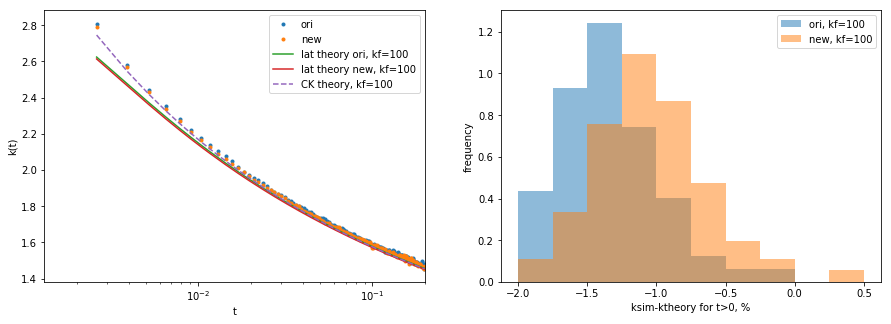

In [149]:
import math
import numpy as np
from math import sqrt,pi,log
from scipy import special
import mpmath as mp
import matplotlib.pyplot as plt
%matplotlib inline
mydehoog = mp.calculus.inverselaplace.deHoog(mp)

D=1
kd= 4.0*pi*D
rm=0.005
td = (rm*2)**2/4/D
tcut = 0#100*td
R=2*rm
f=1.0208582 
C=R/D**0.5
g = 0.577216
kz = lambda z: 2*np.pi*D*complex(z)**0.5*C*special.kv(1,C*(complex(z)**0.5))/complex(z)/special.kv(0,C*(complex(z)**0.5)) 

def ktl(kaf,t,pa): #lattice kt for long time
    ka = kaf*kd
    factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            
    Pa=ka*factor/D
    voxelr =rm*f
    if pa=='new':  
        #voxelr=rm*f
        Pa=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
    C1 = 12*4*D/(voxelr*2)**2
    C2 = (1./Pa-1)*2*math.pi/sqrt(3)
    if pa=='ck':
        C1=4*D/R/R
        C2=4*pi*D/ka-2*g
    F = C1*t
    A=np.log(F)+C2
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)
    print('Pa {},rv {}'.format(Pa,voxelr))
    return t3   

def invlt(kaf,t):    #inverse laplace transform of k(z)
    ka=kaf*kd  
    mp.dps = 15;
    fp= lambda z: ka/(complex(z)+ka/kz(z))
    t = mp.convert(t)
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def err(a,b):
    return (a-b)*100/a

def diff(time,ksim):
    #ktck = np.array([invlt(kaf,t) for t in time]) #from inverse LT
    ktck = ktl(kaf,time,'ck')    
    return err(ktck,ksim)
    

fig,ax = plt.subplots(1,2,figsize=(15,5))
  #expected

tt=T[0][1:]
ktck = np.array([invlt(kaf,t) for t in tt]) #from inverse LT
orilat = ktl(kaf,tt,'ori')
newlat = ktl(kaf,tt,'new')
print(newlat[-1],tt[-1])
#ktck = ktl(kaf,tt,'ck')
#diffori = err(ktck,orilat)
#diffnew = err(ktck,newlat)

idx0 = T[0]>tcut

#simulation result
ax[0].semilogx(T[0][idx0],KT[0][idx0],'.',label='ori')
ax[0].set_ylim(ktck[-1]*0.95,ktck[tt>tcut][0]*1.05)
ax[0].set_xlim(tcut,T[0][-1])
ax[0].set_ylabel('k(t)')
ax[0].set_xlabel('t')

ax[1].hist(diff(T[0][idx0],KT[0][idx0]),range=(-2,0.5),normed=True,label='ori, kf='+str(kaf),alpha=0.5)

idx1 = T[1]>tcut
ax[0].semilogx(T[1][idx1],KT[1][idx1],'.',label='new')
ax[1].hist(diff(T[1][idx1],KT[1][idx1]),range=(-2,0.5),normed=True,label='new, kf='+str(kaf),alpha=0.5)
ax[0].plot(tt,orilat,'-',label='lat theory ori, kf='+str(kaf))
ax[0].semilogx(tt,newlat,'-',label='lat theory new, kf='+str(kaf))
ax[0].plot(tt,ktck,'--',label='CK theory, kf='+str(kaf))

ax[0].legend()
ax[1].legend()
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('ksim-ktheory for t>{}, %'.format(tcut))

In [6]:
perr

array([1.45887779e+09, 3.64048761e+04, 8.07081386e-02])

td 2.5e-05


/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


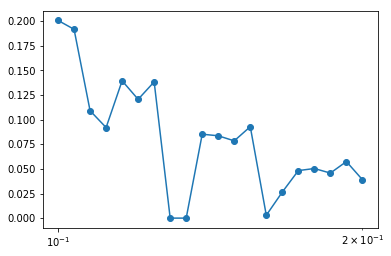

In [60]:
from scipy.optimize import curve_fit
import math
import numpy as np
from math import sqrt,pi,log
from scipy import special
from scipy.integrate import quad 

D=1
kd= 4.0*pi*D
rm=0.005
td = (rm*2)**2/4/D
print('td',td)
R=2*rm
f=1.0208582 
g = 0.577216
kaf=100
N=423.
Area = 42.3799

def func(t): #lattice kt for long time
    C1=ka
    C2=R
    b1=4*D/C2/C2
    A=np.log(b1*t)+4*pi*D/C1-2*g
    return 4*pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

ka=kaf*kd 
def S(t):
    conc = N/Area
    return [np.exp(-conc*quad(func,0,tt)[0]) for tt in t]

tt=np.logspace(-1,math.log(0.2)/math.log(10),20)
st = S(tt)
plt.semilogx(tt,st,'o-')

In [15]:
f=1.0208582 
l=2*0.005*f
int(25.*pi*sqrt(3)/6/(pi*l*l/4))

276999

In [57]:
10**-0.7

0.19952623149688797

In [1]:
100.**(1./3)

4.641588833612778